## Import

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring data

### Read cleaned data from file

In [3]:
# Read data from CSV file
movie_df = pd.read_csv('../data/processed/data.csv')

# Display the first 5 lines of data
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Question 1: How is the pace of development in terms of the number of movies for the three countries with the largest number of movies?

#### Top 3 

In [15]:
df_explode = movie_df.copy()
df_explode['country']=df_explode['country'].str.split(', ')
df_country=df_explode.explode('country').reset_index(drop=True)
df_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
#Filtering out the unknown country from dataframe
df_cleaned = df_country[(df_country['country']!='Unknown') & (df_country['type']=='Movie') ]
top_3_countries = df_cleaned['country'].value_counts().iloc[:3]
top_3_countries

country
United States     2751
India              962
United Kingdom     532
Name: count, dtype: int64

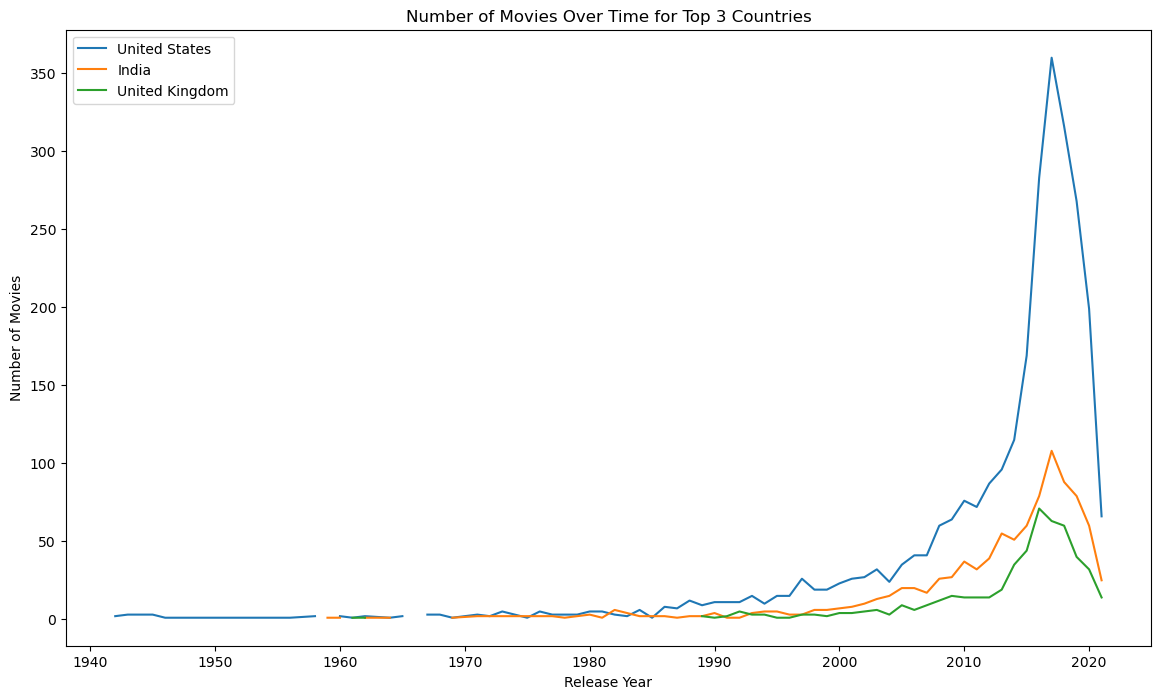

In [34]:
# Filter data for the top 3 countries
top_3_countries_data = df_cleaned[df_cleaned['country'].isin(top_3_countries.index)]

# Group by country and release year to get the count of movies for each year
grouped_data = top_3_countries_data.groupby(['country', 'release_year']).size().unstack()

# Plotting
plt.figure(figsize=(14, 8))
for country in top_3_countries.index:
    plt.plot(grouped_data.loc[country], label=country)

plt.title('Number of Movies Over Time for Top 3 Countries')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

### Question 2: What movie genres are commonly produced in the United States?

In [38]:
df_explode = movie_df.copy()
df_explode['country'] = df_explode['country'].str.split(', ')
df_country = df_explode.explode('country').reset_index(drop=True)

df_country = df_country[(df_country['country'] == 'United States') & (df_country['type']=='Movie')]

df_country['listed_in'] = df_country['listed_in'].str.split(', ')
df_country = df_country.explode('listed_in').reset_index(drop=True)

df_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
4,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...


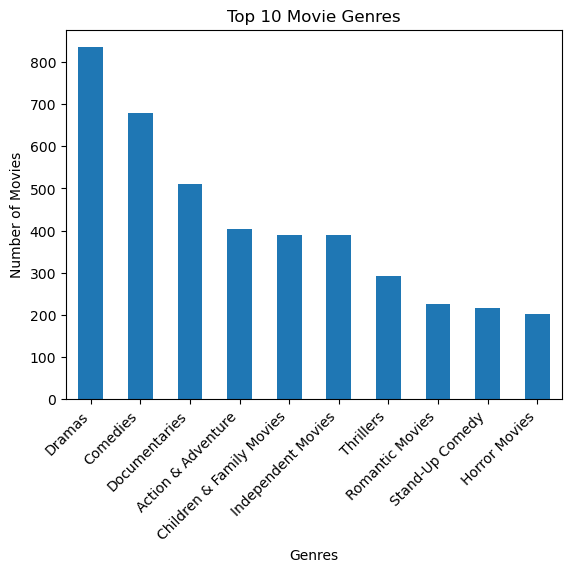

In [41]:
top_10_genres = df_country['listed_in'].value_counts().sort_values(ascending=False).iloc[:10]
top_10_genres

# Assuming 'top_10_genres' is a pandas Series with genre names as index and counts as values
top_10_genres.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()